### MATH 3375 Project 7 - K-Means Clustering 

For this project, we will use a data set with 38 features representing measures of sensors in an urban waste water treatment plant. There is no response variable. Therefore, this is an **unsupervised** model. The objective is to **_classify_** the broad states of the treatment plant by _**clustering**_ similar data points together. Different clusters could then be analyzed to aid in predicting specific faults when future measures are recorded. 
 

Below is documentation related to the data set. 

    Title: Faults in a urban waste water treatment plant

    Relevant Information:

    This dataset comes from the daily measures of sensors in a urban waste water treatment plant. The objective is to 
    classify the operational state of the plant in order to predict faults through the state variables of the plant 
    at each of the stages of the treatment process. This domain has been stated as an ill-structured domain. 
   
  
    Number of instances: 527

    Number of Attributes: 38

    There are some missing values, all are unknown information.
    [INSTRUCTOR NOTE: MISSING VALUES HAVE BEEN IMPUTED WITH THE MEDIAN FOR EACH FEATURE.]

    Attribute Information:

    All atrributes are numeric and continuous

    N.  Attrib.    
     1  Q-E        (input flow to plant)  
     2  ZN-E       (input Zinc to plant)
     3  PH-E       (input pH to plant) 
     4  DBO-E      (input Biological demand of oxygen to plant) 
     5  DQO-E      (input chemical demand of oxygen to plant)
     6  SS-E       (input suspended solids to plant)  
     7  SSV-E      (input volatile supended solids to plant)
     8  SED-E      (input sediments to plant) 
     9  COND-E     (input conductivity to plant) 
    10  PH-P       (input pH to primary settler)
    11  DBO-P      (input Biological demand of oxygen to primary settler)
    12  SS-P       (input suspended solids to primary settler)
    13  SSV-P      (input volatile supended solids to primary settler)
    14  SED-P      (input sediments to primary settler) 
    15  COND-P     (input conductivity to primary settler)
    16  PH-D       (input pH to secondary settler) 
    17  DBO-D      (input Biological demand of oxygen to secondary settler)
    18  DQO-D      (input chemical demand of oxygen to secondary settler)
    19  SS-D       (input suspended solids to secondary settler)
    20  SSV-D      (input volatile supended solids to secondary settler)
    21  SED-D      (input sediments to secondary settler)  
    22  COND-D     (input conductivity to secondary settler) 
    23  PH-S       (output pH)   
    24  DBO-S      (output Biological demand of oxygen)
    25  DQO-S      (output chemical demand of oxygen)
    26  SS-S       (output suspended solids)
    27  SSV-S      (output volatile supended solids) 
    28  SED-S      (output sediments) 
    29  COND-S     (output conductivity)
    30  RD-DBO-P   (performance input Biological demand of oxygen in primary settler)
    31  RD-SS-P    (performance input suspended solids to primary settler)
    32  RD-SED-P   (performance input sediments to primary settler)
    33  RD-DBO-S   (performance input Biological demand of oxygen to secondary settler)
    34  RD-DQO-S   (performance input chemical demand of oxygen to secondary settler)
    35  RD-DBO-G   (global performance input Biological demand of oxygen)
    36  RD-DQO-G   (global performance input chemical demand of oxygen)
    37  RD-SS-G    (global performance input suspended solids) 
    38  RD-SED-G   (global performance input sediments)



In [2]:
water_data <- read.csv("water_treatment_p7.csv")
head(water_data)

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,⋯,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,44101,1.5,7.8,182,407,166,66.3,4.5,2110,7.9,⋯,2000,39.6,58.8,95.5,85.4,70.0,90.2,79.4,87.3,99.6
2,39024,3.0,7.7,182,443,214,69.2,6.5,2660,7.7,⋯,2590,39.6,60.7,94.8,85.4,80.8,90.2,79.5,92.1,100.0
3,32229,5.0,7.6,182,528,186,69.9,3.4,1666,7.7,⋯,1888,39.6,58.2,95.6,85.4,52.9,90.2,75.8,88.7,98.5
4,35023,3.5,7.9,205,588,192,65.6,4.5,2430,7.8,⋯,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
5,36924,1.5,8.0,242,496,176,64.8,4.0,2110,7.9,⋯,2120,39.6,62.7,95.6,85.4,71.0,92.1,78.2,87.5,99.5
6,38572,3.0,7.8,202,372,186,68.8,4.5,1644,7.8,⋯,1764,39.6,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0


## Tasks

### Exploratory Data Analysis

#### 1. Generate a data summary and boxplot for all features.

First generate a data summary for all columns of the data set.  Then create boxplots for all 38 features. 

**_HINT:_** You can combined multiple boxplots by plotting multiple columns at one time.  To do this, you should plot sets of features in one plot for any set of features with **_similar ranges of data_**.

Example: Your data summary should reveal that features PH_E, PH_P, PH_D, PH_S all have a similar range of values. Therefore, plotting them on the same set of axes will take less space, make them easy to read, and allow them to be compared easily. Either line of code below will accomplish this:

    boxplot(water_data[,c('PH_E','PH_P','PH_D','PH_S')])  
**OR**

    boxplot(water_data[,c(3,10,16,23)])
    

      Q_E             ZN_E             PH_E           DBO_E      
 Min.   :10050   Min.   : 0.100   Min.   :6.900   Min.   : 31.0  
 1st Qu.:32980   1st Qu.: 0.900   1st Qu.:7.600   1st Qu.:148.0  
 Median :36000   Median : 1.500   Median :7.800   Median :182.0  
 Mean   :37204   Mean   : 2.356   Mean   :7.809   Mean   :188.2  
 3rd Qu.:41104   3rd Qu.: 3.000   3rd Qu.:8.000   3rd Qu.:222.0  
 Max.   :60081   Max.   :33.500   Max.   :8.700   Max.   :438.0  
     DQO_E            SS_E            SSV_E           SED_E       
 Min.   : 81.0   Min.   :  98.0   Min.   :13.20   Min.   : 0.400  
 1st Qu.:326.2   1st Qu.: 170.0   1st Qu.:55.83   1st Qu.: 3.200  
 Median :399.0   Median : 196.0   Median :64.30   Median : 4.500  
 Mean   :406.5   Mean   : 227.4   Mean   :61.44   Mean   : 4.587  
 3rd Qu.:473.0   3rd Qu.: 242.0   3rd Qu.:69.60   3rd Qu.: 5.500  
 Max.   :941.0   Max.   :2008.0   Max.   :85.00   Max.   :36.000  
     COND_E          PH_P           DBO_P            SS_P          SS

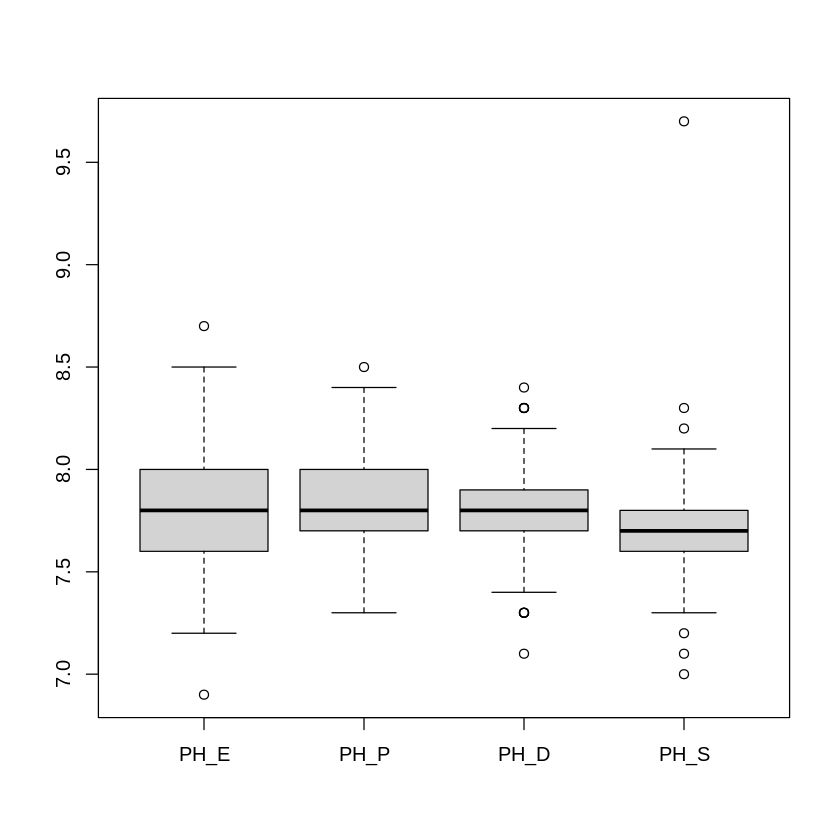

In [3]:
#Put code for Exercise 1 in this cell. You may add additional cells if you like.

library(ggplot2)

summary(water_data)

# Boxplots
boxplot(water_data[, c('PH_E', 'PH_P', 'PH_D', 'PH_S')])


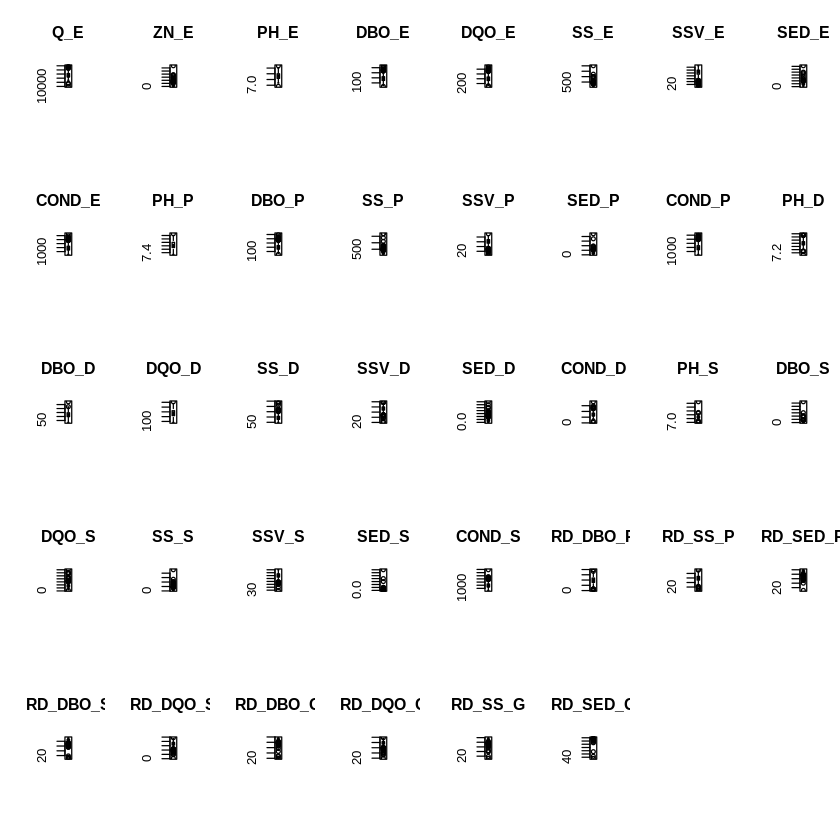

In [4]:
par(mfrow = c(5, 8))  

for (col in names(water_data)) {
  boxplot(water_data[, col], main = col)
}

### Scale Data

#### 2. Scale All Features 

Scale the values in every column with _**common scaling**_ so that all values range from 0 to 1. Note that you should be **_replacing_** the original values in each column with their scaled conversions. 

_Example:_ If an original column has values 2,5,8,12 then the scaled column should have values 0,0.3,0.6,1.  

(Refer to previous course notes on _common scaling_.)

In [3]:
#Put code for Exercise 2 in this cell. You may add additional cells if you like.
# non-numeric columns from scaling
numeric_columns <- water_data[sapply(water_data, is.numeric)]

# Scale numeric columns
scaled_data <- as.data.frame(scale(numeric_columns))

# original columns with the scaled values
water_data[sapply(water_data, is.numeric)] <- scaled_data



### Create K-Means Clusters

#### 3. Create K-Means clusters for several values of k using all 38 features

Using each value of k from 2 to 15, create a k-means cluster model.  Save the _total within sum-of-squares_ value for each value of k. Display the details of each cluster model.

In [4]:
#Put solution to Exercise 3 in this cell. You may add additional cells if you like.
library(stats)

# numeric columns for clustering
numeric_data <- water_data[sapply(water_data, is.numeric)]

# the total within sum-of-squares
wss_values <- numeric(0)

# K-Means clusters of k from 2 to 15
for (k in 2:15) {
  kmeans_model <- kmeans(numeric_data, centers = k)
  wss_values <- c(wss_values, kmeans_model$tot.withinss)
  
  cat(paste("Cluster Model for k =", k, ":\n"))
  print(kmeans_model)
  cat("\n")
}

# total sum-of-squares values
cat("Total Within Sum-of-Squares (WSS) for Each Value of k:\n")
print(wss_values)


Cluster Model for k = 2 :
K-means clustering with 2 clusters of sizes 264, 262

Cluster means:
         Q_E        ZN_E       PH_E      DBO_E      DQO_E        SS_E
1 -0.1187981  0.03793596  0.4766656  0.4686467  0.5479450  0.09530827
2  0.1197050 -0.03822555 -0.4803042 -0.4722242 -0.5521278 -0.09603582
       SSV_E      SED_E     COND_E       PH_P      DBO_P       SS_P      SSV_P
1  0.3045131  0.3408399  0.4843214  0.4909758  0.5123890  0.1364728  0.2729977
2 -0.3068376 -0.3434418 -0.4880185 -0.4947237 -0.5163004 -0.1375146 -0.2750816
       SED_P     COND_P       PH_D      DBO_D      DQO_D       SS_D      SSV_D
1  0.3513636  0.4951090  0.4880211  0.5822881  0.5991462  0.3255548  0.1901478
2 -0.3540458 -0.4988885 -0.4917465 -0.5867330 -0.6037199 -0.3280399 -0.1915993
       SED_D     COND_D       PH_S        DBO_S      DQO_S         SS_S
1  0.2840365  0.5071673  0.1069534  0.004859872  0.1177286 -0.006681405
2 -0.2862047 -0.5110388 -0.1077699 -0.004896970 -0.1186273  0.006732408
     

### Select Preferred Cluster Model

#### 4. Create an 'Elbow Diagram' and use it to identify the best value of k

The elbow diagram is a plot with k-values on the x-axis and 'within SS' measures on the y-axis (representing total distance of points from their centroid).  Each individual point should be clearly visible on the plot, and the points should be connected by a line.  Make sure to label your plot appropriately.

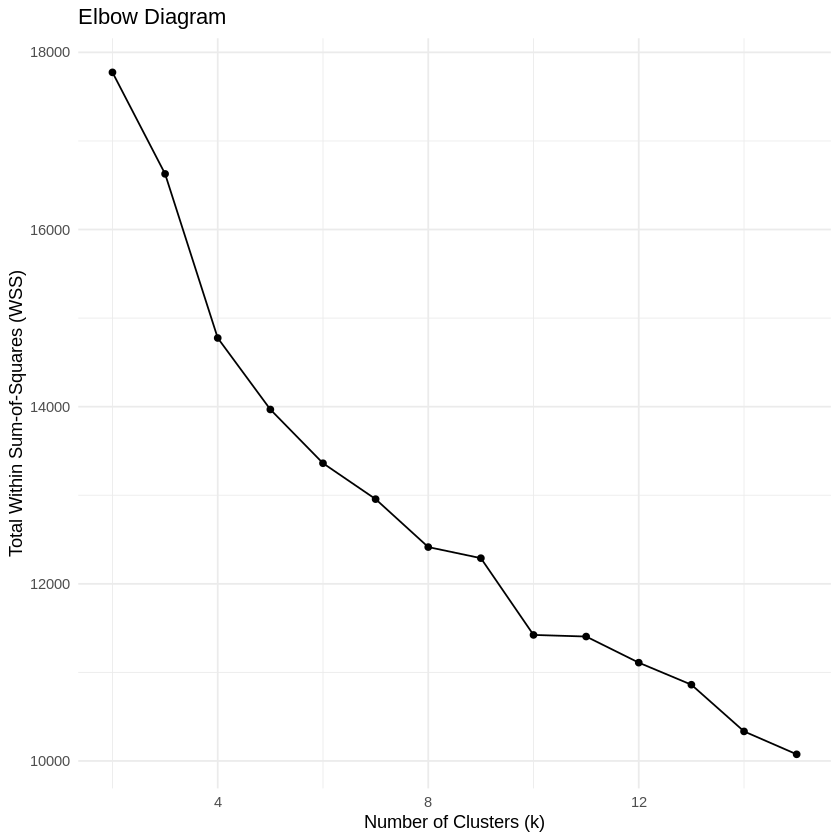

In [5]:
#Put solution to Exercise 4 in this cell. You may add additional cells if you like.

library(ggplot2)

# data frame with k and WSS values
elbow_data <- data.frame(K = 2:15, WSS = wss_values)

# elbow diagram
elbow_plot <- ggplot(elbow_data, aes(x = K, y = WSS)) +
  geom_line() +
  geom_point() +
  labs(title = "Elbow Diagram",
       x = "Number of Clusters (k)",
       y = "Total Within Sum-of-Squares (WSS)") +
  theme_minimal()

print(elbow_plot)


#### 4a. Report Your Results

Based on your plot, identify the most appropriate value to use for k.


k = 9 and k = 10 has the most appropriate value to use for k

### Visualize Clusters

#### 5. Create a 2D plot showing the composition of clusters.

Examine your selected model (with the value of k that you identified above). Pick TWO features that appear most well distinguished between clusters (values of that feature should be as different as possible from one feature to another). 

Create a 2-dimensional scatterplot of all data points, using the 2 features you selected as x and y coordinates. _**Color the points based on the cluster to which they were assigned by your selected model above.**_ 

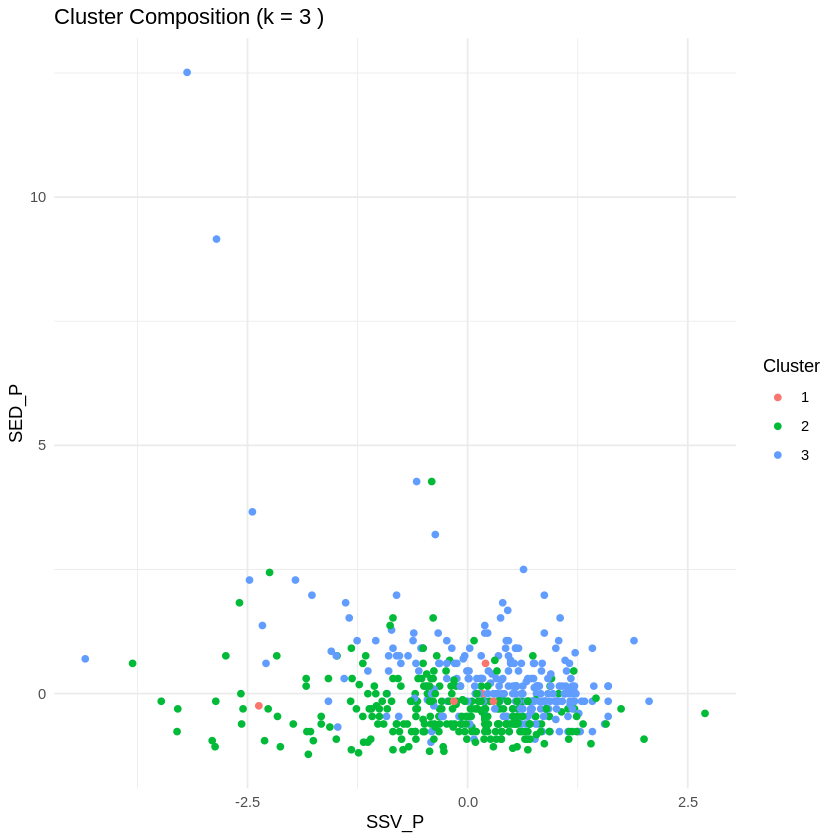

In [6]:
# K-Means model
selected_k <- 3 
kmeans_model <- kmeans(numeric_data, centers = selected_k)

# cluster assignment
water_data$Cluster <- as.factor(kmeans_model$cluster)

# two features
x_column <- 1  # Column of Q-E
y_column <- 2 # Column of ZN-E

# 2D scatterplot
scatterplot <- ggplot(water_data, aes(x = water_data[, x_column], y = water_data[, y_column], color = Cluster)) +
  geom_point() +
  labs(
    title = paste("Cluster Composition (k =", selected_k, ")"),
    x = colnames(water_data)[x_column],
    y = colnames(water_data)[y_column]
  ) +
  theme_minimal()

print(scatterplot)


#### 5a. Report Your Results

Using only the 2 predictors to represent the data points, how does the plot look? Are you able to visualize different regions for the clusters in only 2 dimensions? 

yes, you can visulaize the difference in the regions. it is clustered in most parts around (0,0).